### Python using SciPy

*Author*: Christopher Davis

*Date*: 2018-10-02

In [1]:
import numpy as np
from scipy.integrate import ode, solve_ivp

In [2]:
def micro_1(times,init,parms):
    beta, r, mu, K, alpha = parms
    S,I = init
    # ODEs
    dS = r*(1-S/K)*S - beta*S*I
    dI = beta*S*I-(mu + alpha)*I
    return [dS,dI]

In [3]:
w = 1
m = 10
beta = 0.0247*m*w**0.44
r = 0.6*w**-0.27
mu = 0.4*w**-0.26
K = 16.2*w**-0.7
alpha = (m-1)*mu

In [4]:
parms = [beta,r,mu,K,alpha]
init = [K,1.]
times = np.linspace(0,10,101)

In [5]:
sir_sol = solve_ivp(fun=lambda t, y: micro_1(t, y, parms), t_span=[min(times),max(times)], y0=init, t_eval=times)

#### Visualisation

In [6]:
import matplotlib.pyplot as plt

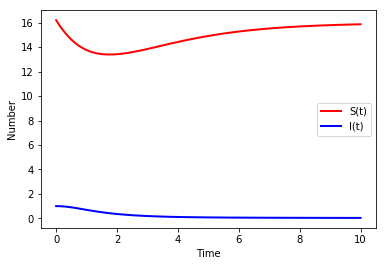

In [7]:
plt.plot(sir_sol.t,sir_sol.y[0],color="red",linewidth=2, label = "S(t)")
plt.plot(sir_sol.t,sir_sol.y[1],color="blue",linewidth=2, label = "I(t)")
plt.xlabel("Time")
plt.ylabel("Number")
plt.legend()

#### Threshold criterion for transmission rate

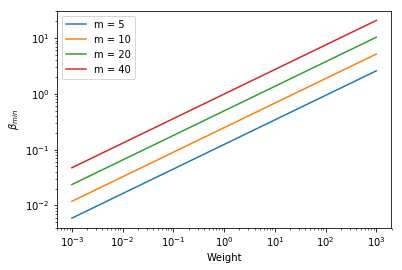

In [14]:
m = [5,10,20,40]
ws = 10**np.linspace(-3,3,601)
betas = np.zeros((601,4))
for i in range(4):
    betas[:,i] = 0.0247*m[i]*ws**0.44
plt.loglog(ws,betas)
plt.xlabel("Weight")
plt.ylabel(r'$\beta_{min}$')
plt.legend(("m = 5", "m = 10", "m = 20", "m = 40"))